In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import pandas as pd
import OAPBuoyData as OAP, commonfxns as cf, diagsPP, viz
import cftime
import OAPBuoyComp as bc

In [2]:
compsD=bc.loadAllComps(compsdir='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/CanESM51_1975_2022/comps/',freq='daily')
compsM=bc.loadAllComps(compsdir='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/CanESM51_1975_2022_monthly/comps/',freq='monthly')

In [17]:
with xr.open_dataset('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/sos_Oday_CanESM5-1_historical_r1i1p2f1_gn_19710101-19801231.nc') as fS:
    print(fS['sos'])

<xarray.DataArray 'sos' (time: 3650, j: 291, i: 360)> Size: 2GB
[382374000 values with dtype=float32]
Coordinates:
  * time       (time) object 29kB 1971-01-01 12:00:00 ... 1980-12-31 12:00:00
  * j          (j) int32 1kB 0 1 2 3 4 5 6 7 ... 283 284 285 286 287 288 289 290
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 838kB ...
    longitude  (j, i) float64 838kB ...
Attributes:
    standard_name:  sea_surface_salinity
    long_name:      Sea Surface Salinity
    comment:        Sea water salinity is the salt content of sea water, ofte...
    units:          0.001
    original_name:  sos
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello


Question: What scale is SSS on here? psu? TEOS10 S_A?

In [18]:
with xr.open_dataset('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/chlos_Omon_CanESM5-1_historical_r1i1p2f1_gn_185001-201412.nc') as fS:
    print(fS['chlos'])

<xarray.DataArray 'chlos' (time: 1980, j: 291, i: 360)> Size: 830MB
[207424800 values with dtype=float32]
Coordinates:
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * j          (j) int32 1kB 0 1 2 3 4 5 6 7 ... 283 284 285 286 287 288 289 290
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 838kB ...
    longitude  (j, i) float64 838kB ...
Attributes:
    standard_name:  mass_concentration_of_phytoplankton_expressed_as_chloroph...
    long_name:      Surface Mass Concentration of Total Phytoplankton Express...
    comment:        Sum of chlorophyll from all phytoplankton group concentra...
    units:          kg m-3
    original_name:  NCHL
    history:        deptht_l1_mltby1em6
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello


In [19]:
with xr.open_dataset('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/spco2_Omon_CanESM5-1_historical_r1i1p2f1_gn_185001-201412.nc') as fS:
    print(fS['spco2'])

<xarray.DataArray 'spco2' (time: 1980, j: 291, i: 360)> Size: 830MB
[207424800 values with dtype=float32]
Coordinates:
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * j          (j) int32 1kB 0 1 2 3 4 5 6 7 ... 283 284 285 286 287 288 289 290
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 838kB ...
    longitude  (j, i) float64 838kB ...
    depth      float64 8B ...
Attributes:
    standard_name:  surface_partial_pressure_of_carbon_dioxide_in_sea_water
    long_name:      Surface Aqueous Partial Pressure of CO2
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          Pa
    original_name:  spco2
    history:        mltby0.101325 2022-11-22T04:17:16Z altered by CMOR: Treat...
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello


In [6]:
list(compsD.keys())[0]

('pmel_co2_moorings_0088_00e7_268c', 'sos', 'daily')

In [9]:
compsD[list(compsD.keys())[0]]

evalfxns.timeSeriesComp(
	 modvar=sos, stationID=pmel_co2_moorings_0088_00e7_268c, staname=CRIMP1  NOAA Surface Ocean CO2 and Ocean Acidification Mooring Time Series, freq=daily
	 other instance variables:version,shortTitle,shortID,lat,lon,savepath,figsavepath,compsavepath,tref,yrfaco,yrfacm,mlen,obs_tdt,obs_val,dispName,dispUnits,dispNameUnits,obsvar,mod_tnl,mod_tdt,mod_val,obs_yd,obs_ym,iiOLo,mod_yd,mod_ym,mod_yind,obs_yind,fityrlen,iiOLm,obs_trange,mod_trange,OL_trange,trange,defaultfit,modfits,obsfits,mod_targetdind,obs_targetdind,target_datetime,mod_target,obs_target,obs_target_b,mod_targetdeseas,obs_targetdeseas,obs_targetdeseas_b,mod_gsmooth,obs_gsmooth,obs_gsmooth_b,modfitlist,stats,mod_tind,obs_tind,obs_tind_b,mod_intt,obs_intt)

In [22]:
list(compsM.keys())[0]

('pmel_co2_moorings_0088_00e7_268c', 'chlos', 'monthly')

In [4]:
dfb=OAP.loadOAPInfo(modelgrid=True)

/tmp/ipykernel_2181841/2223273197.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(1,4,figsize=(16,2),gridspec_kw={'wspace':.4})


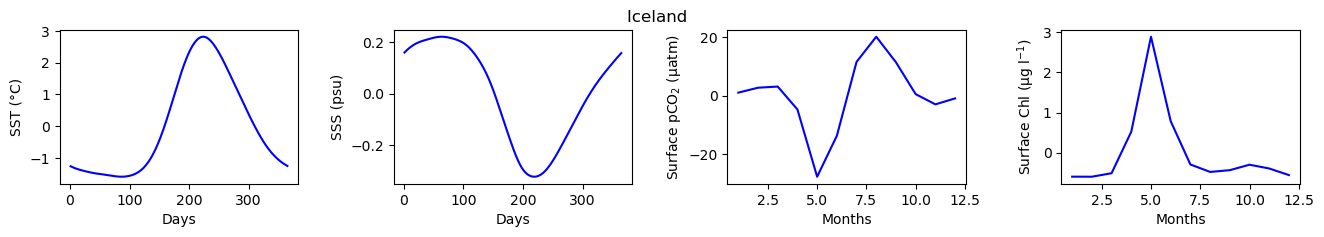

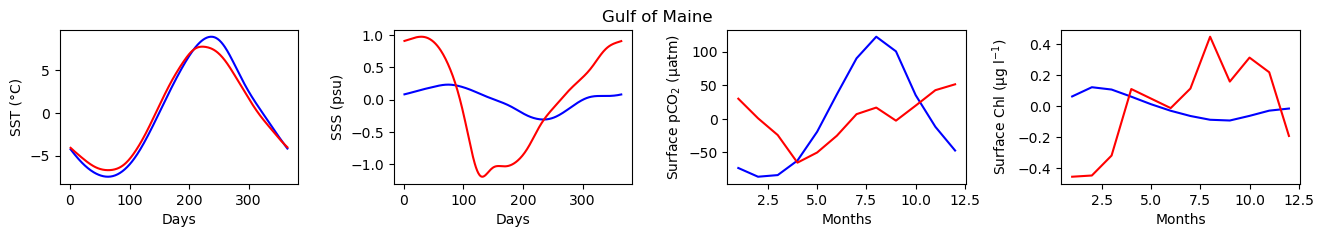

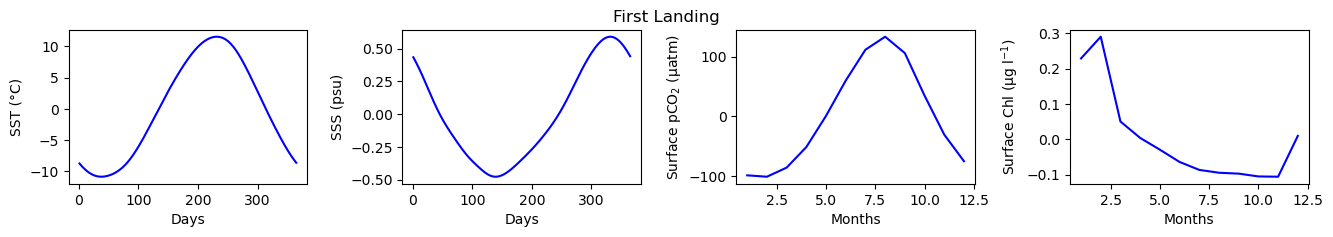

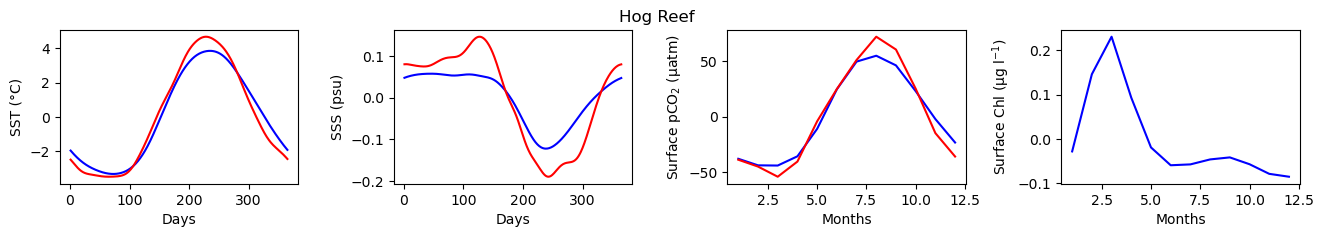

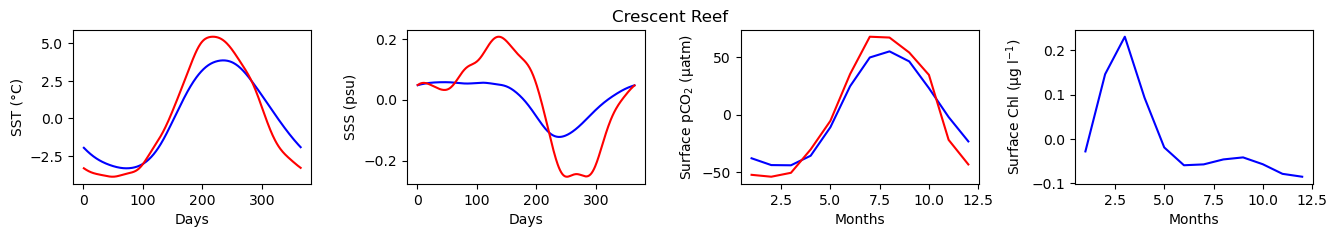

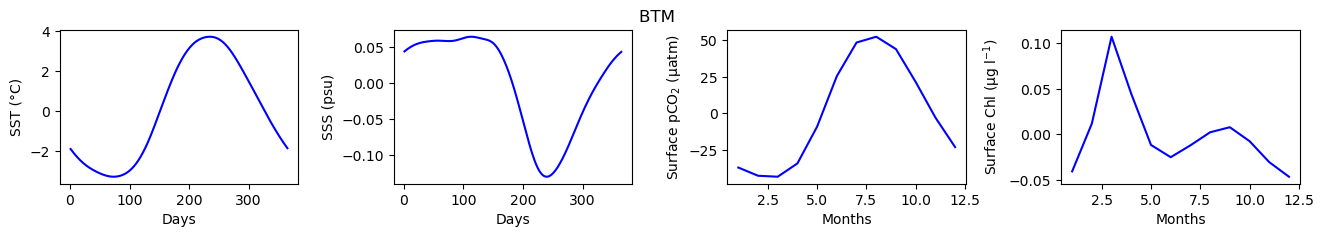

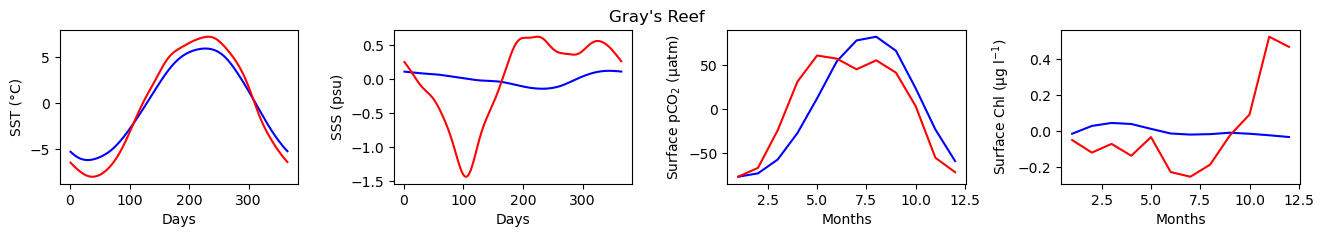

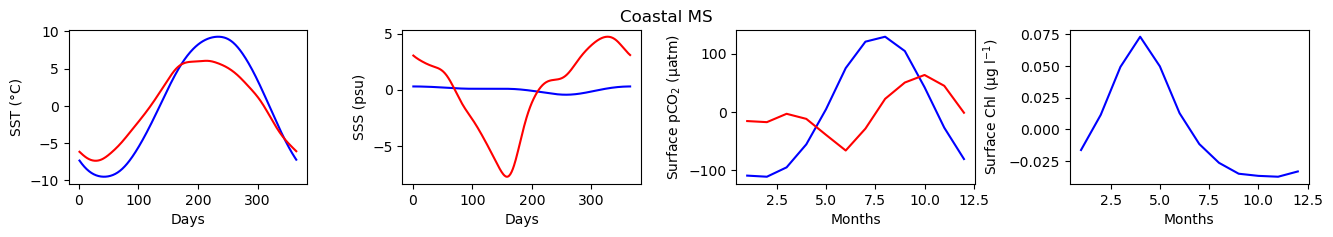

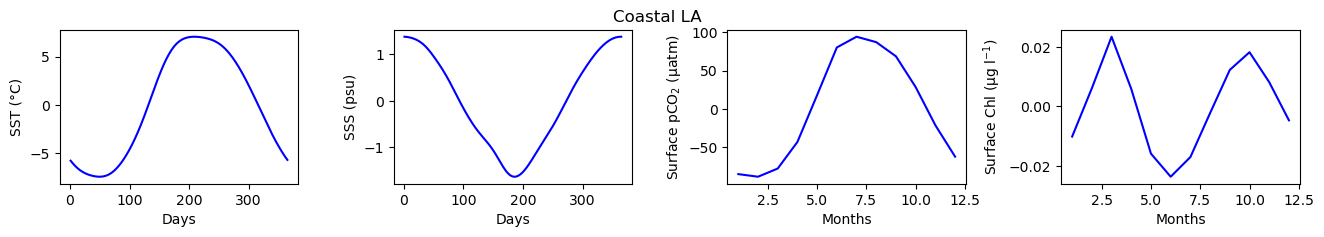

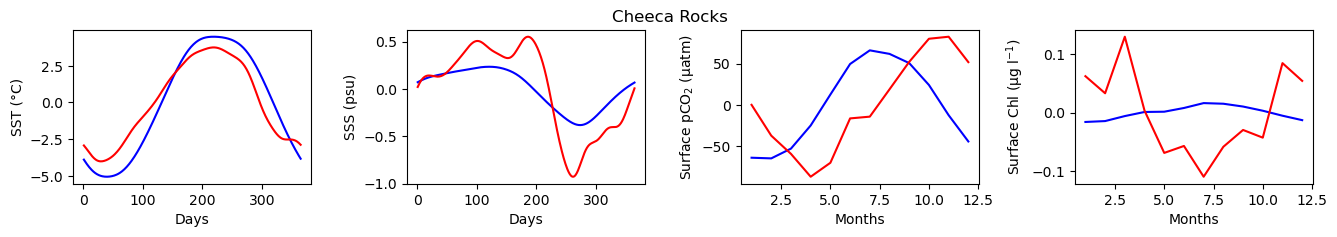

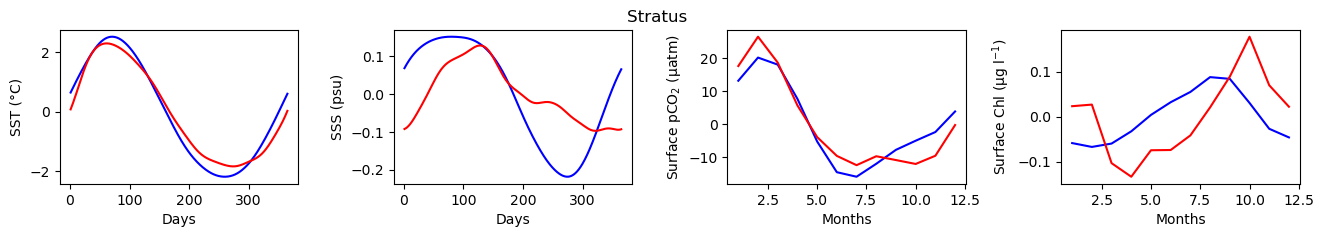

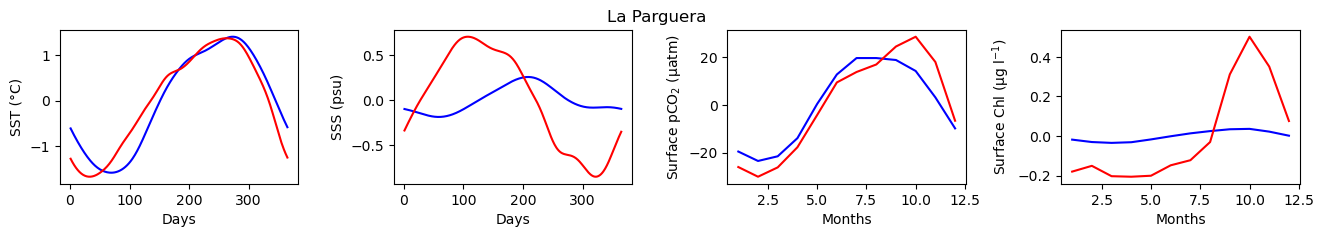

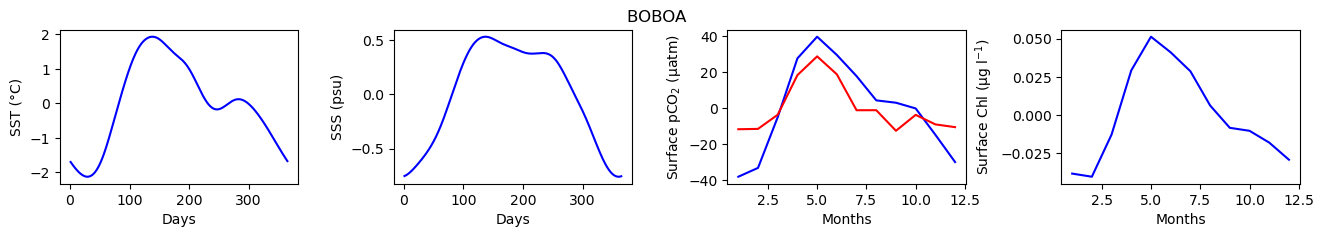

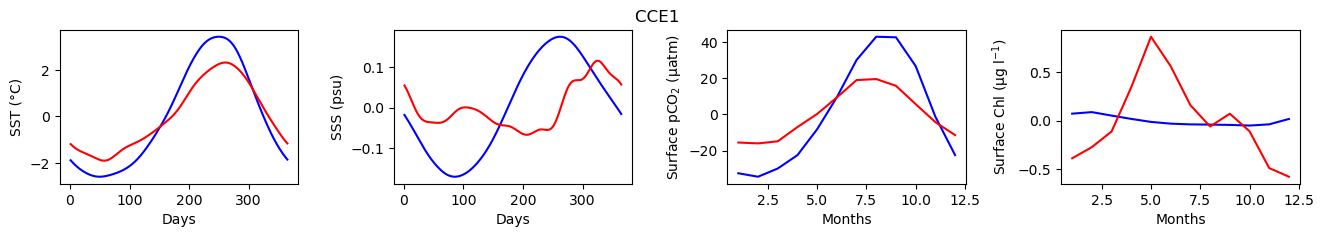

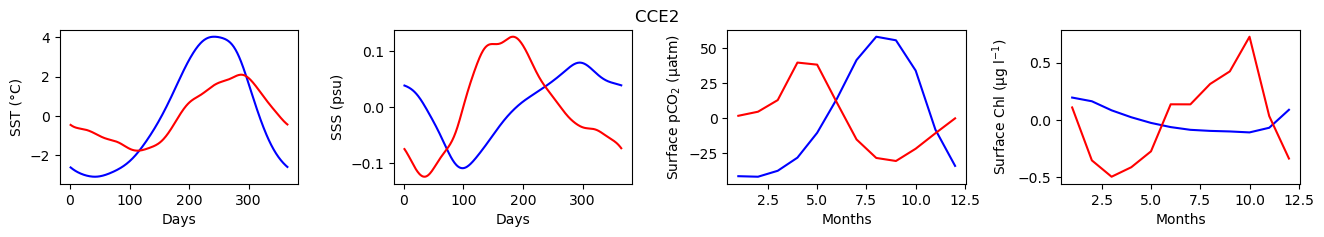

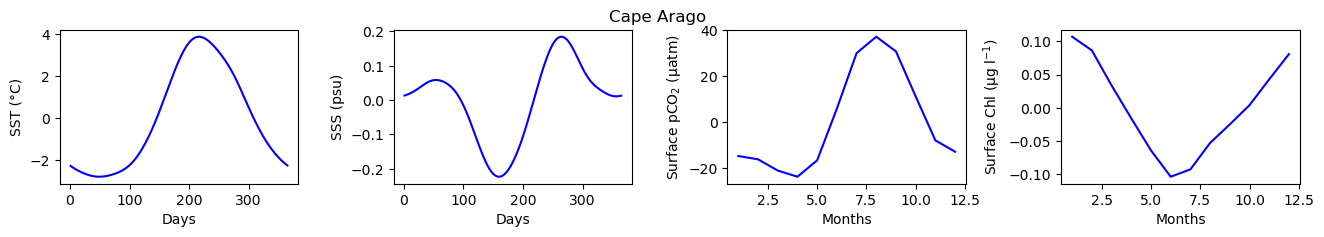

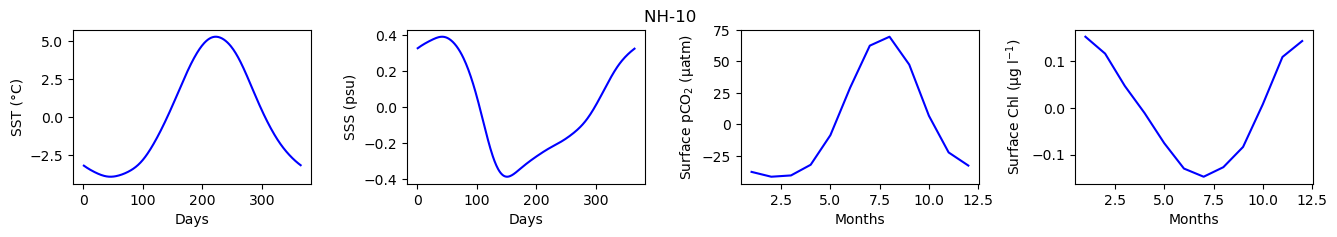

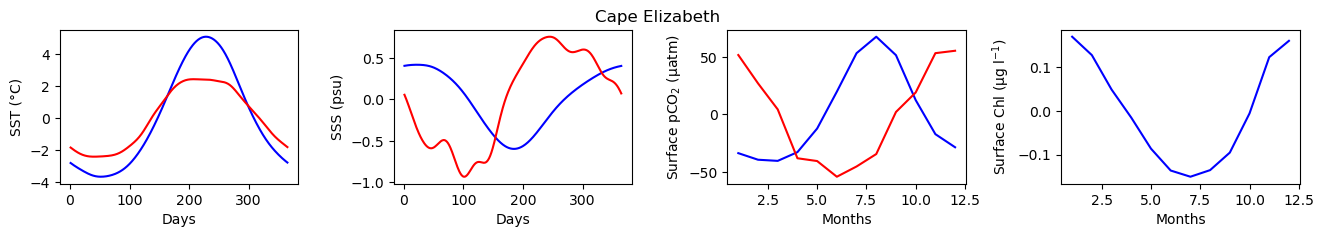

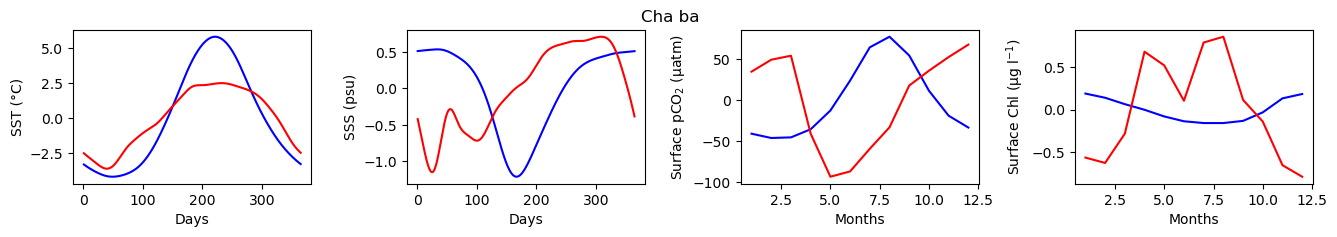

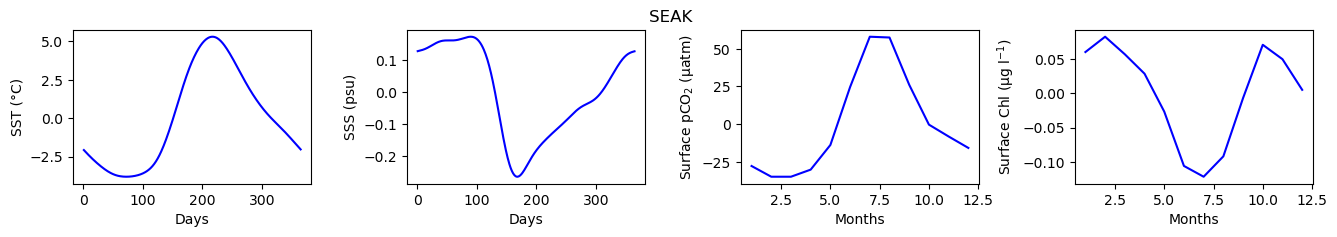

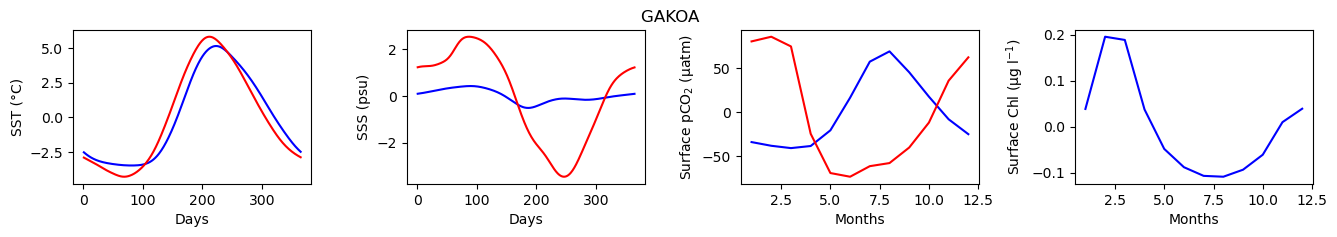

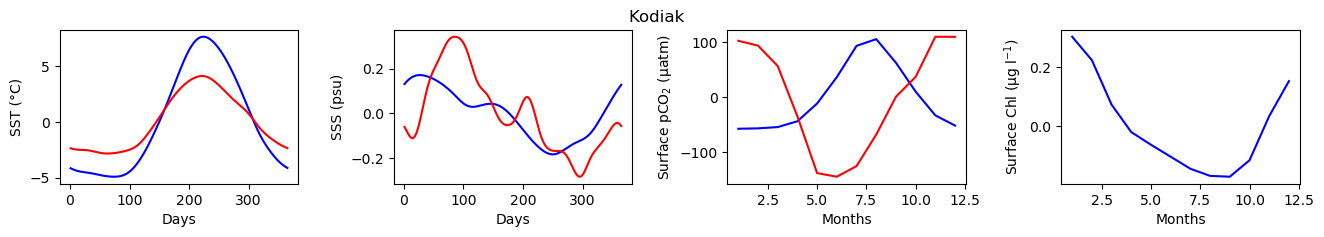

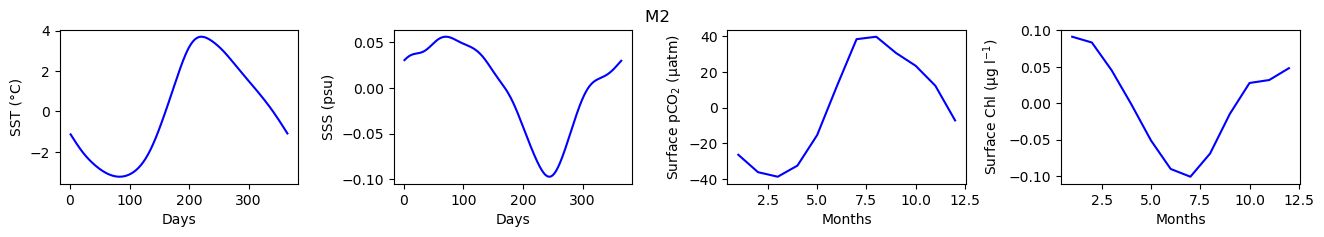

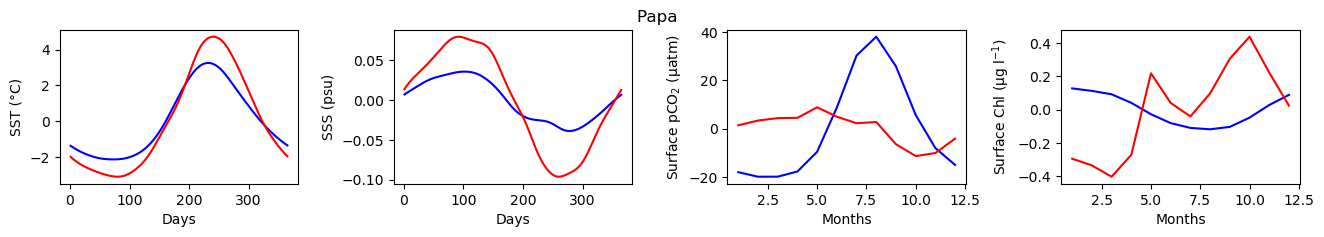

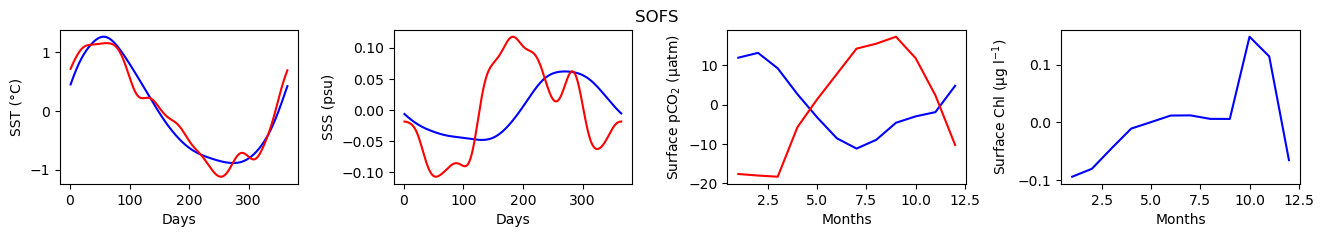

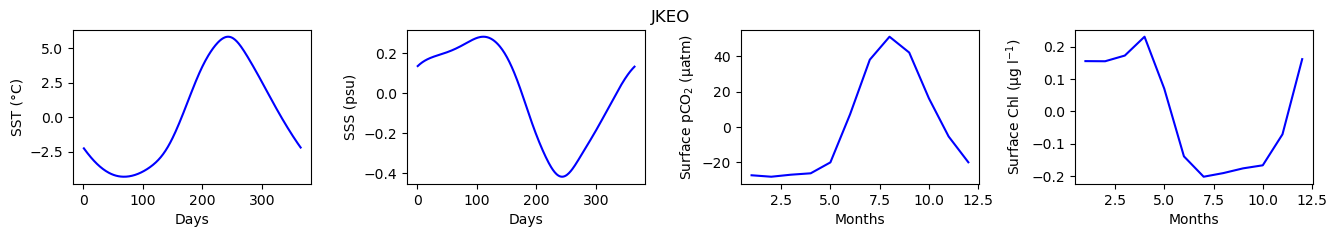

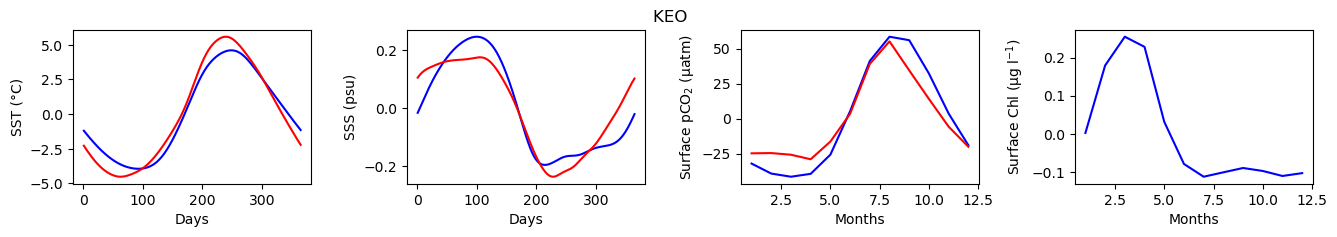

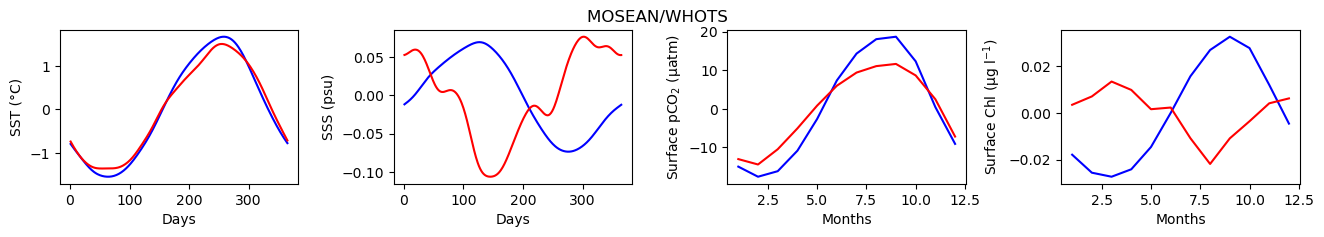

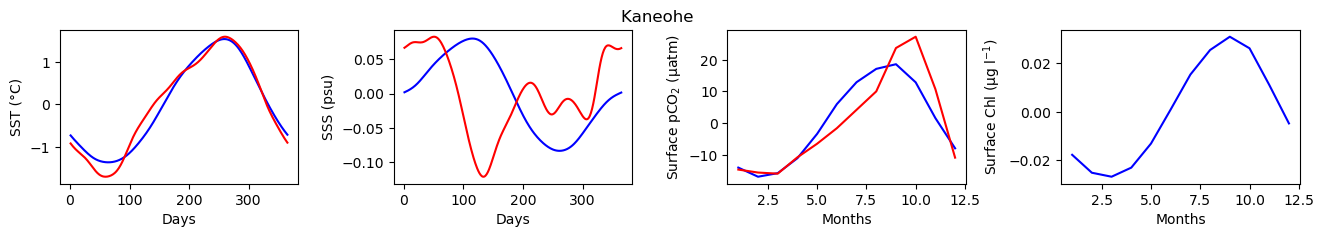

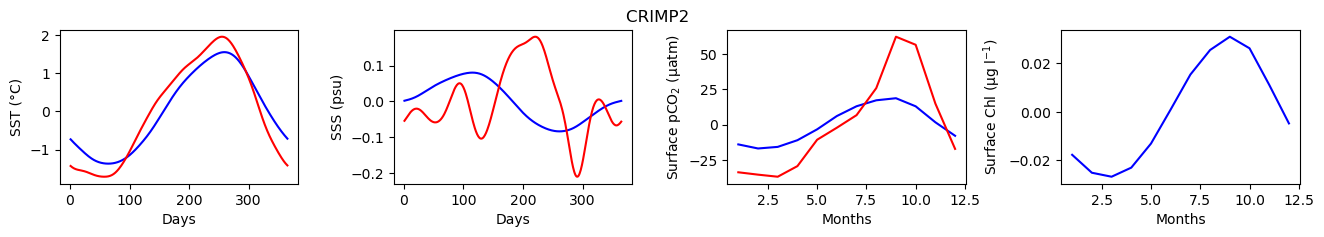

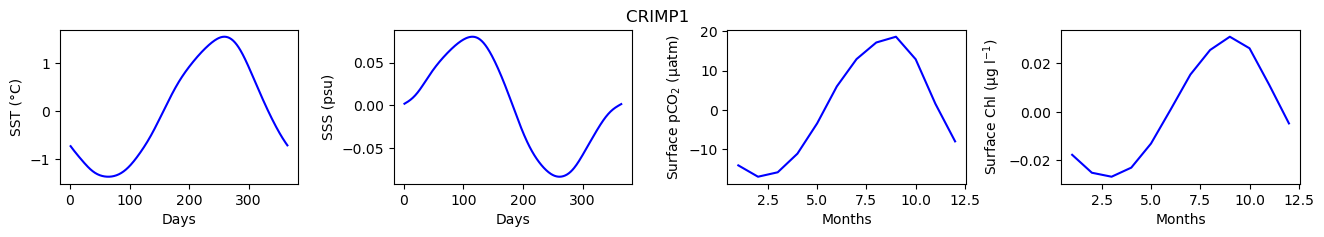

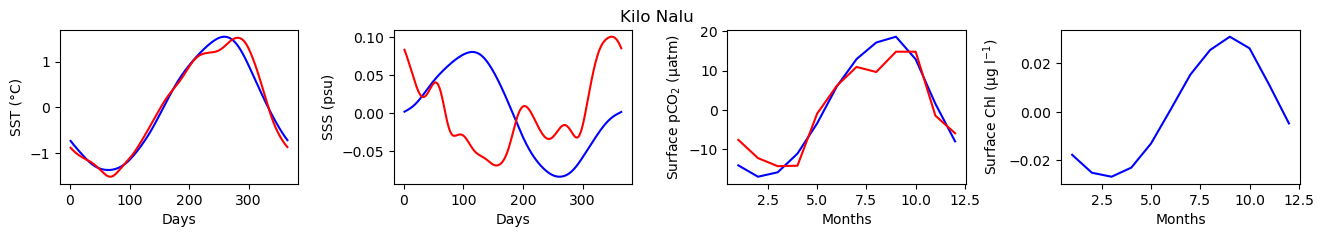

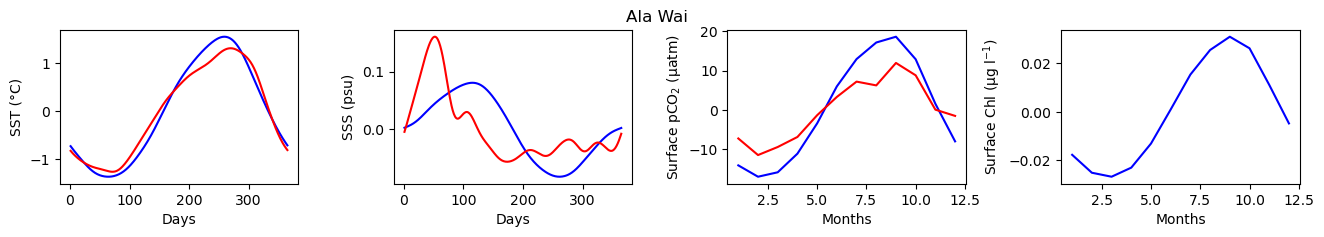

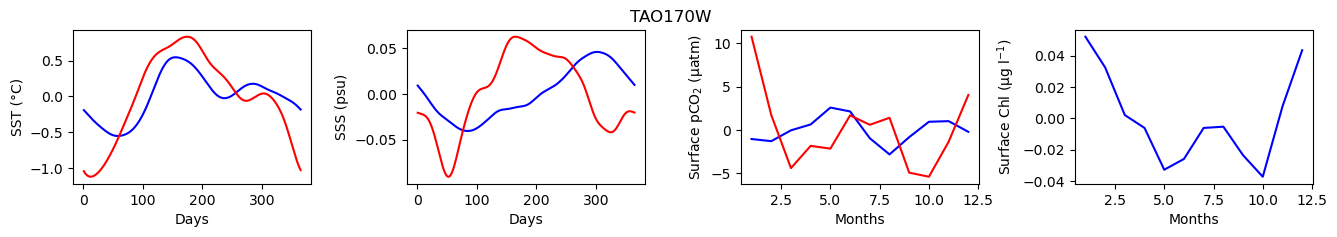

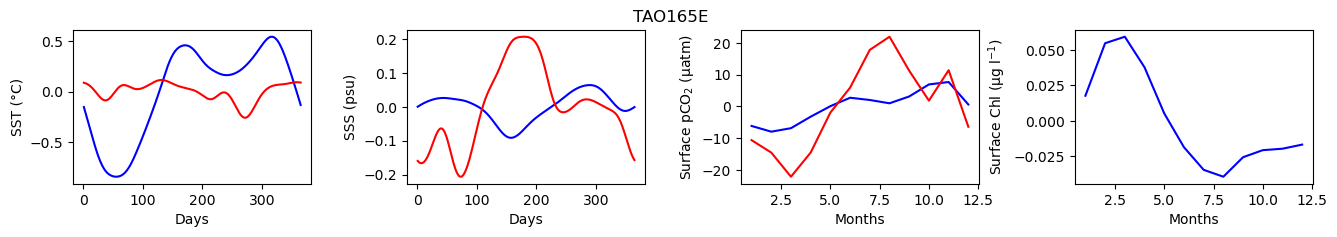

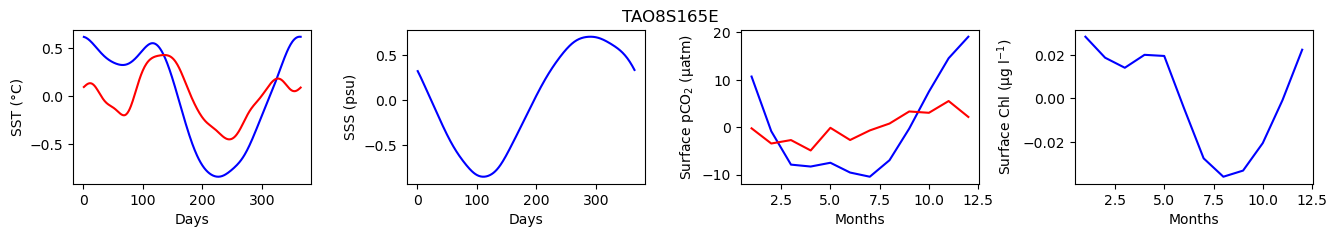

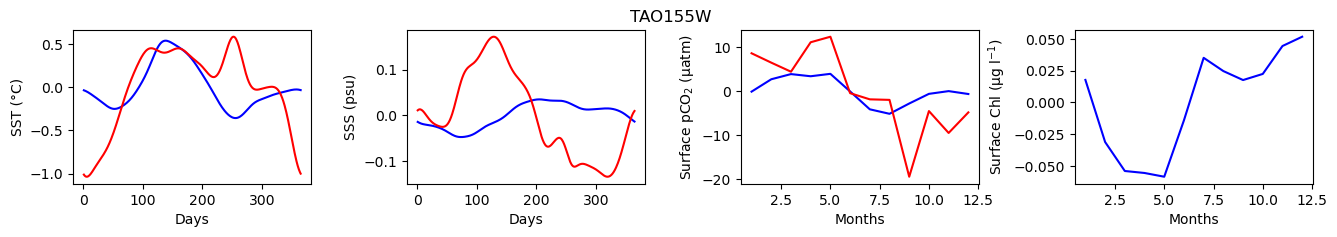

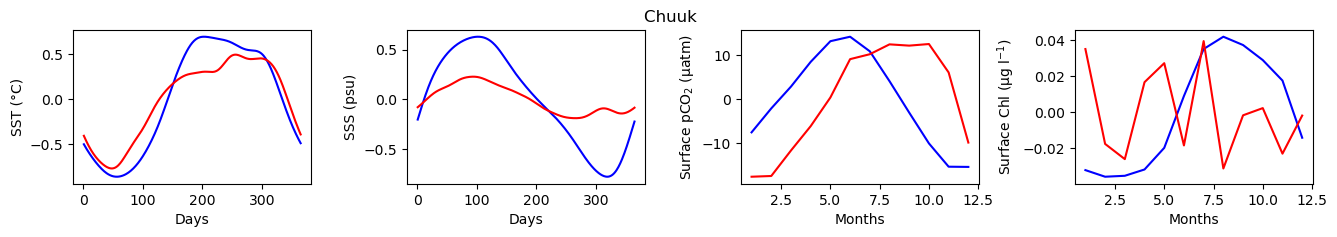

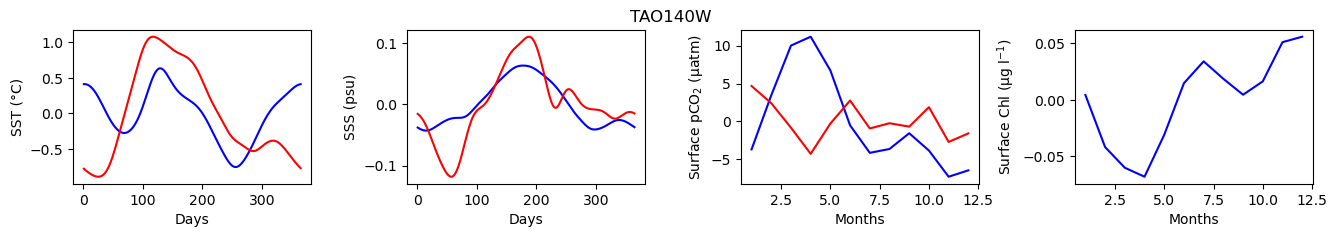

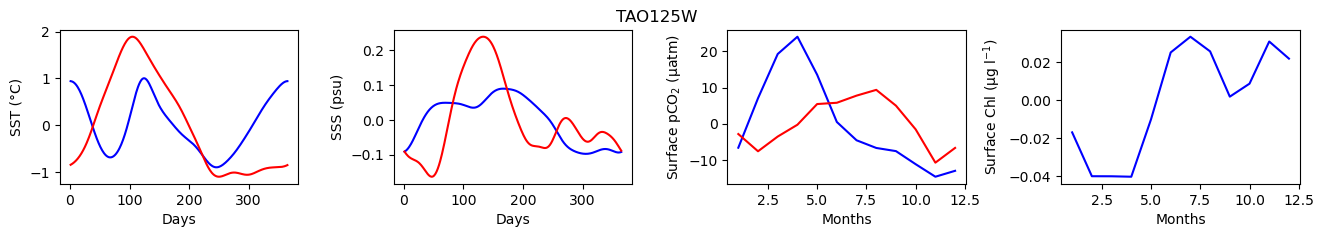

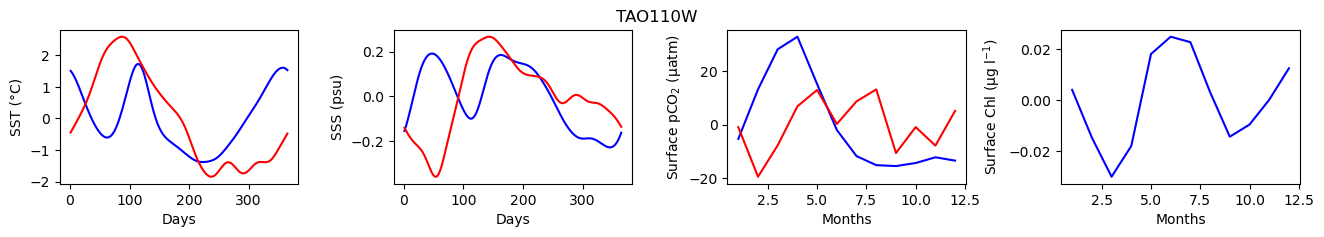

In [30]:
for ind, row in dfb.iterrows():
    fig,ax=plt.subplots(1,4,figsize=(16,2),gridspec_kw={'wspace':.4})
    def _plots(iax,vec,c):
        iax.plot(vec,c.mod_gsmooth,'b-')
        iax.plot(vec,c.obs_gsmooth,'r-')
        return
    try:
        c=compsD[(row['datasetID'],'tos','daily')]
        _plots(ax[0],np.arange(1,366),c)
    except KeyError:
        pass
    try:
        c=compsD[(row['datasetID'],'sos','daily')]
        _plots(ax[1],np.arange(1,366),c)
    except KeyError:
        pass
    try:
        c=compsM[(row['datasetID'],'spco2','monthly')]
        _plots(ax[2],np.arange(1,13),c)
    except KeyError:
        pass
    try:
        c=compsM[(row['datasetID'],'chlos','monthly')]
        _plots(ax[3],np.arange(1,13),c)
    except KeyError:
        pass
    fig.suptitle(row['shortTitle'])
    ax[0].set_ylabel(bc.dispNameUnits['tos'])
    ax[0].set_xlabel('Days')
    ax[1].set_ylabel(bc.dispNameUnits['sos'])
    ax[1].set_xlabel('Days')
    ax[2].set_ylabel(bc.dispNameUnits['spco2'])
    ax[2].set_xlabel('Months')
    ax[3].set_ylabel(bc.dispNameUnits['chlos'])
    ax[3].set_xlabel('Months')

In [ ]:
c2=bc.loadMoorComp('pmel_co2_moorings_ba50_a09b_5565','tos','monthly',path='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/CanESM51_1975_2022_monthly/comps/')